In [1]:
import graficas as g
import entropia as en
import matplotlib.pyplot as plt
import numpy as np
import time
import importlib

In [17]:
importlib.reload(en)

<module 'entropia' from 'C:\\proyectos\\repositorios\\pt_robustez\\entropia.py'>

In [2]:
num_simulaciones = 50

In [3]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia(G_BA))
        entropia_WS.append(en.entropia(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(entropia_BA)
    matriz_WS_fallos.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 191.9808361530304


In [4]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia(G_BA))
        entropia_WS.append(en.entropia(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(entropia_BA)
    matriz_WS_ataques.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 205.69871497154236


In [5]:
resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


[]

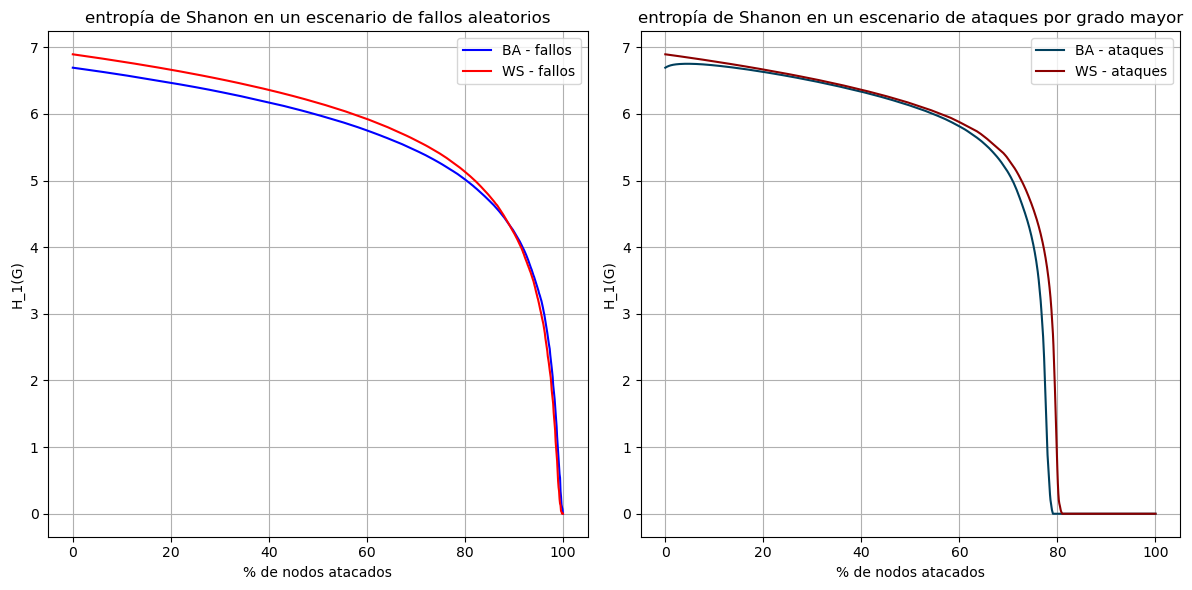

In [6]:
x = np.linspace(0,100,len(resultados_BA_fallos))


fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='blue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='red')
axs[0].set_title('entropía de Shanon en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('H_1(G)')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='#003f5c')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='#8b0000')
axs[1].set_title('entropía de Shanon en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('H_1(G)')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()

In [7]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_normalizada(G_BA))
        entropia_WS.append(en.entropia_normalizada(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(entropia_BA)
    matriz_WS_fallos.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 202.36551475524902


In [8]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_normalizada(G_BA))
        entropia_WS.append(en.entropia_normalizada(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(entropia_BA)
    matriz_WS_ataques.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 221.36235451698303


In [9]:
resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


[]

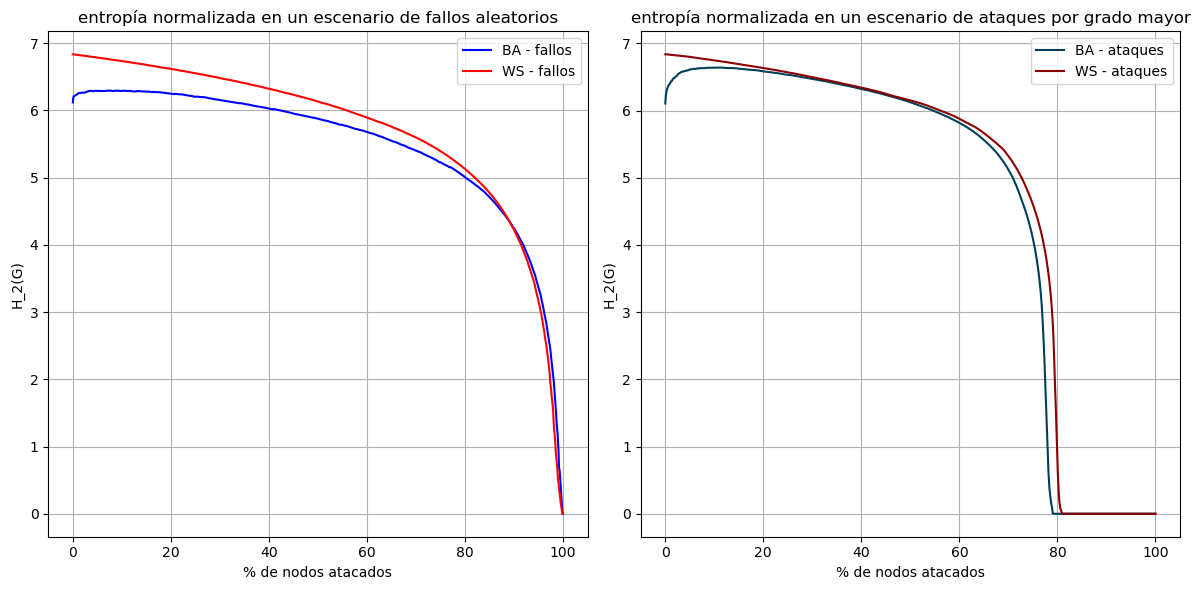

In [10]:
fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='blue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='red')
axs[0].set_title('entropía normalizada en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('H_2(G)')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='#003f5c')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='#8b0000')
axs[1].set_title('entropía normalizada en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('H_2(G)')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()

In [11]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_distribucion(G_BA))
        entropia_WS.append(en.entropia_distribucion(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(entropia_BA)
    matriz_WS_fallos.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 64.56398797035217


In [12]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,15,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_distribucion(G_BA))
        entropia_WS.append(en.entropia_distribucion(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(entropia_BA)
    matriz_WS_ataques.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 87.00279879570007


In [13]:
resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

[]

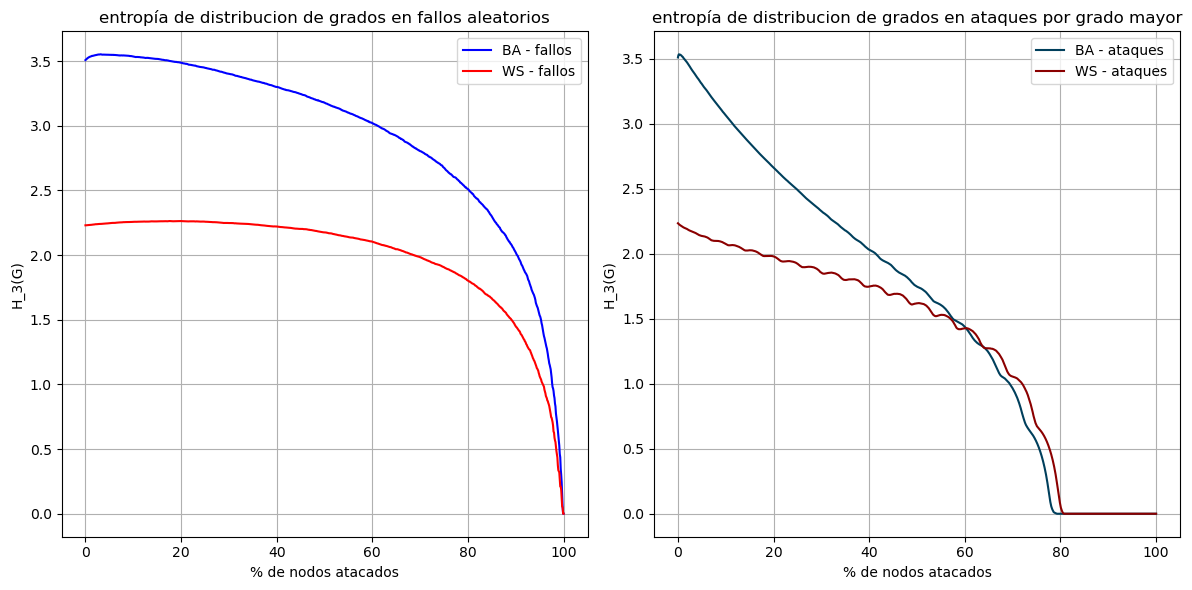

In [15]:
fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='blue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='red')
axs[0].set_title('entropía de distribucion de grados en fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('H_3(G)')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='#003f5c')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='#8b0000')
axs[1].set_title('entropía de distribucion de grados en ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('H_3(G)')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()